In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0, 0.5, 'Weight')

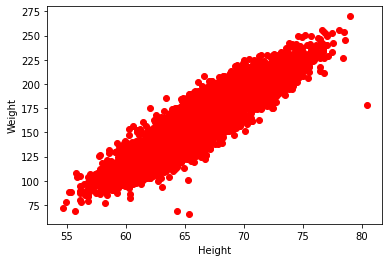

In [4]:
plt.scatter(df['Height'],df['Weight'],color = 'red')
plt.xlabel('Height')            
plt.ylabel('Weight')

In [5]:
x= df[['Height']] 
y= df[['Weight']]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.70,random_state = 1 )

In [8]:
xtrain

,Height
257,63.644060
2238,69.612990
1339,61.310798
1152,70.532513
7892,68.900899
...,...
2895,71.382577
7813,66.148829
905,66.539812
5192,66.563772


In [9]:
ytrain

,Weight
257,158.422717
2238,184.198452
1339,150.316449
1152,194.302259
7892,192.640037
...,...
2895,205.545795
7813,152.749747
905,175.093255
5192,156.832191


In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [11]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [12]:
df['pred_Weight'] = reg.predict(df[['Weight']])

In [13]:
df.head()

,Gender,Height,Weight,pred_Weight
0,Male,73.847017,241.893563,1517.544276
1,Male,68.781904,162.310473,902.903762
2,Male,74.110105,212.740856,1292.390477
3,Male,71.730978,220.042470,1348.782711
4,Male,69.881796,206.349801,1243.030729


In [14]:
reg.score(xtest,ytest)

0.8531719524654922

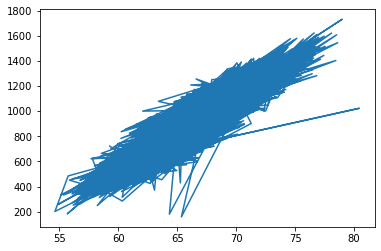

In [15]:
plt.plot(df.Height, df.pred_Weight)

# KNeighborsRegressor

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
 neigh = KNeighborsRegressor(n_neighbors=5)

In [18]:
neigh.fit(xtrain, ytrain)

KNeighborsRegressor()

In [19]:
print(neigh.predict([[1]]))

[[89.71844669]]


# KNeighborsClassifier

In [20]:
df = pd.read_csv('weight-height.csv')

In [21]:
x= df[['Weight']]
y= df[['Gender']]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.70,random_state = 1 )

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [26]:
neigh.fit(x,y)

C:\Users\10946\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [27]:
print(neigh.predict([[1.1]]))

['Female']


# ROC

In [28]:
import seaborn as sns

In [29]:
df.Gender.value_counts()

Male      5000
Female    3555
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

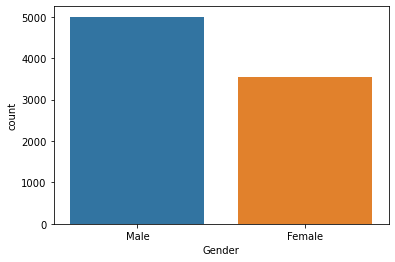

In [30]:
sns.countplot(x='Gender',data = df)

<AxesSubplot:xlabel='Weight', ylabel='count'>

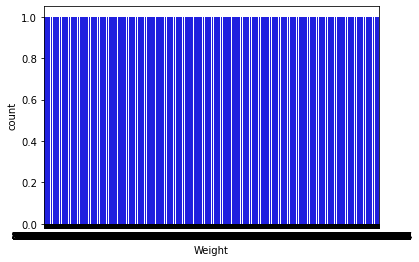

In [31]:
sns.countplot(x='Weight',data = df,color = 'blue')

<AxesSubplot:xlabel='Weight', ylabel='count'>

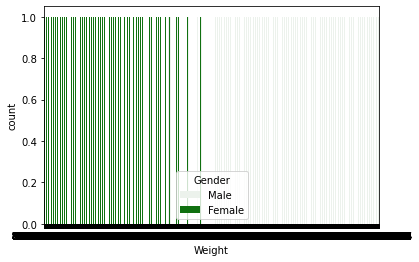

In [32]:
sns.countplot(x='Weight',data = df, hue = 'Gender',color = 'green',)

# Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
clf = DecisionTreeClassifier()

In [35]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

# Model Evalution

In [36]:
pred = clf.predict(xtest) #predicted class/y
pred

array(['Male', 'Female', 'Male', ..., 'Male', 'Female', 'Female'],
      dtype=object)

In [37]:
import numpy as np
np.array(ytest)

array([['Female'],
       ['Male'],
       ['Male'],
       ...,
       ['Female'],
       ['Female'],
       ['Female']], dtype=object)

In [38]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve

In [39]:
cm = confusion_matrix(ytest,pred)

In [40]:
cm

array([[2084,  412],
       [ 395, 3098]], dtype=int64)

Text(33.0, 0.5, 'Actual Value')

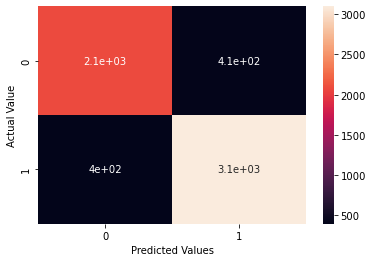

In [41]:
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Value')

In [42]:
tp,fn,fp,tn = confusion_matrix(ytest, pred).reshape(-1)

In [43]:
tp

2084

In [44]:
fn

412

In [45]:
fp

395

In [46]:
tn

3098

In [47]:
3098/(tp+fn+fp+tn)

0.517281683085657

In [48]:
clf.score(xtest,ytest)

0.865252963766906

# ROC

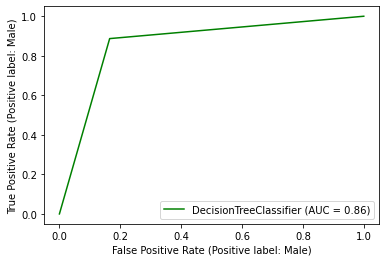

In [49]:
plot_roc_curve(clf,xtest,ytest,color = 'green')

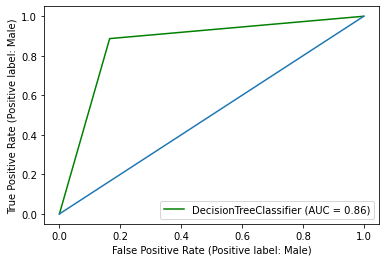

In [50]:
plot_roc_curve(clf,xtest,ytest,color = 'green')
plt.plot([0,1],[0,1])

# Label Encoder

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
label = LabelEncoder()

In [54]:
df.Gender = label.fit_transform(df['Gender'])

In [58]:
df.Gender.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [59]:
df.Gender.tail()

8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, dtype: int32